<left>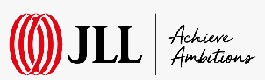</left>

## Investment Outlook -  All Markets

#### USAGE GUIDE: 

0. LOAD VIRTUAL ENVIRONMENT geo_env
1. VERY IMPORTANT!! MAKE THE DATABANK STRUCTURE REMAINS THE SAME EVERY QUARTER!!
2. CHECK THE CONFIGURATION CELL BELOW AND CHANGE "FILE OUTPUT NAME" ,  "DATABANK TO BE LOADED"(FX. Q3 2021 DATABANK .XLX)
3. LOAD ALL THE DATABASES AND CONVERT THEM IN DICTIONARIES
4. CHECK THAT ALL THE SERIES MATCH THE TIME PERIOD
5. All elements in series need to be the same format!! its not acceptable to have a string in the middle and number.
6. All column names need to be in the same format(FX ('2021' is not the same as " 2021"))
7. Always Start your code from prs=Presentation('Canadian_report_template.pptx') , to test the charts
8. Always erase the file you output
9. Check if there are any NaN in your you data.

#### NOTE

- Make sure the dictionary keys are the same! don't change that!
- Using data from YTD requires that all observations in PSF are Numbers not Strings or Floats!


#### HELP FILES FOR PANDAS AND PPTX  :

- https://python-pptx.readthedocs.io/en/latest/user/placeholders-using.html
- https://python-pptx.readthedocs.io/en/latest/user/charts.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html

#### Configuration:

In [31]:
Databank_name='Canada CM Databank - Q4 2021_v6.xlsx'
file_output_name="Q4_2021_Vancouver_INV_OUT.pptx"

#### Loading and Formatting the Databank: 

In [32]:
#Import Packages
#Using the geo_env environment
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor
from pptx.util import Inches, Pt
from pptx.enum.dml import MSO_THEME_COLOR
import numpy as np
import pandas as pd
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.chart.data import ChartData
import numpy as np 
import datetime


from pptx.dml.chtfmt import ChartFormat
from pptx.enum.chart import (
    XL_AXIS_CROSSES,
    XL_CATEGORY_TYPE,
    XL_TICK_LABEL_POSITION,
    XL_TICK_MARK,
    XL_LEGEND_POSITION
)
from pptx.oxml.ns import qn
from pptx.oxml.simpletypes import ST_Orientation
from pptx.shared import ElementProxy
from pptx.text.text import Font, TextFrame
from pptx.util import lazyproperty
from pivottablejs import pivot_ui
import ipypivot as pt

In [33]:
#Filling the Array's NAN with value
def fill_array(arr):
    ind = np.where(~np.isnan(arr))[0]
    first, last = ind[0], ind[-1]
    arr[:first] = arr[first]
    arr[last + 1:] = arr[last]
    return arr

#This only works for data that from the VP and Bonds, IRS , File 15 = 2016 in the VP series
def from_quarter_year(fill_array,Dates_capital_data,series ,number=15):
    Dates_Quarter = pd.to_datetime([f'{x[-4:]}{x[:2]}' for x in Dates_capital_data])
    test=fill_array(series)
    test.index=Dates_Quarter
    Year=test.resample("Y").last()[number:]
    return Year


In [34]:
#Loading Databank "Valuation Parameters" and Creating Panel
capital_data=pd.read_excel(open(Databank_name,'rb'),sheet_name='Valuation Parameters', header=1,index_col= False,engine = 'openpyxl')
#Creating a Dictionary to Access Columns , starts at column 6
Dates_capital_data=capital_data.columns[6:]

# Creating Series Data for pptx Charts, Transpose all the columns starting in column 6,
f1 = capital_data.iloc[:, 6:].T
f2=f1.to_dict('series')
# Create Labels, put them as keys in the new dictionary dictionary_with_panel
Labels=capital_data['Sector']+'_'+capital_data['Parameter']+'_'+capital_data['Sub-Type']+'_'+capital_data['Market']+'_'+capital_data['Class']
dict_VP=dict()
for i in f2.keys():
        dict_VP[list(Labels)[i]]=f2[i]

In [35]:
#Loading Databank "Hist. Inv. Volumes" and Data Structures Necesary
list_inv_volumes=pd.read_excel(open(Databank_name,'rb'),sheet_name='Hist. Inv. Volumes', header=0,index_col= False,engine = 'openpyxl')

#Dictionary For Access to Dates
Dates_Inv_volumes=list_inv_volumes.columns[2:]
  
# Creating Series Data for pptx Charts, Transpose all the columns starting in column 6,
f1 = list_inv_volumes.iloc[:, 2:].T
f2=f1.to_dict('series')

# Series Data for Charts, you can use the other one to create pivot tables
Labels=list_inv_volumes['Market']+'_'+list_inv_volumes['Asset Class']
inv_vol_dict=dict()
for i in f2.keys():
    inv_vol_dict[list(Labels)[i]]=f2[i].fillna(0)

In [36]:
# Loading Databank "Bonds, IRs, Indexes, & MSCI"
Financial_Data=pd.read_excel(open(Databank_name,'rb'),sheet_name='Bonds, IRs, Indexes, & MSCI', header=1,index_col= False,engine = 'openpyxl')

#Dictionary For Access to Dates
Dates_Financial_Data=Financial_Data.columns[6:]
  
# Creating Series Data for pptx Charts, Transpose all the columns starting in column 6,
f1 = Financial_Data.iloc[:, 6:].T
f2=f1.to_dict('series')

Labels=Financial_Data['Vehicle']+'_'+Financial_Data['Type']+'_'+Financial_Data['Geography']+'_'+Financial_Data['Sector']+'_'+Financial_Data['Metric']+'_'+Financial_Data['Source']
Financial_Data_dict=dict()
for i in f2.keys():
    Financial_Data_dict[list(Labels)[i]]=f2[i]

#Financial_Data_dict.keys()



In [37]:
#Loading Databank "YTD Sales Data" 
Sales_Data=pd.read_excel(open(Databank_name,'rb'),sheet_name='Sales Comps - YTD', header=0,engine = 'openpyxl')
Sales_Data_Tables=Sales_Data.filter(items=['Quarter','Sector','Transaction Name', 'Market ','Purchaser 1/ Purchaser 2/ Purchaser 3','Vendor 1/ Vendor 2/ Vendor 3','Adjusted Sale Price','Floor Area Acquired','Price PSF (Built Commercial)'])
Sales_Data_Tables_Multifamily=Sales_Data.filter(items=['Quarter','Sector','Transaction Name', 'Market ','Purchaser 1/ Purchaser 2/ Purchaser 3','Vendor 1/ Vendor 2/ Vendor 3','Adjusted Sale Price','Number of Units','Price per Unit (MF)'])
Sales_Data_Tables_Land=Sales_Data.filter(items=['Quarter','Sector','Transaction Name', 'Market ','Purchaser 1/ Purchaser 2/ Purchaser 3','Vendor 1/ Vendor 2/ Vendor 3','Adjusted Sale Price','Land Area','Price Per Acre (Land)'])

#Sales Data Tables Sorted
Table_Sorted=Sales_Data_Tables.sort_values(by=['Adjusted Sale Price'], ascending=False)
Table_Sorted_Multifamily=Sales_Data_Tables_Multifamily.sort_values(by=['Adjusted Sale Price'], ascending=False)
Table_Sorted_Land=Sales_Data_Tables_Multifamily.sort_values(by=['Adjusted Sale Price'], ascending=False)


In [38]:
#Variables  from "Valuation Parameters"
#dict_VP.keys()

#### Pivot Tables

In [39]:
#pivot_ui(Sales_Data)

### Creating Presentation

In [40]:
#Using the Design of House View--Template
#1. Open Presentation:
prs=Presentation('Canadian_report_template.pptx')

#### SLIDES # MONTREAL 

##### Slide General/Industrial/Land

In [41]:
lyt=prs.slide_layouts[4]
slide=prs.slides.add_slide(lyt)

#look at Place Holders
#for shape in slide.placeholders:
#     print('%d %s' % (shape.placeholder_format.idx, shape.name))

#Save Slide Place Holders
title_1,text_2,chart_1,chart_2,chart_3=slide.placeholders  

In [42]:
# Slide - General | Industrial | Land"
title=slide.shapes.title
title.text="Vancouver - General | Industrial | Land"
########################################################################################################################
########################################################################################################################
#Line Chart-  Cap Rates
chart_data = CategoryChartData()
chart_data.categories=list(Dates_capital_data)
chart_data.add_series('Industrial',    fill_array(dict_VP['Industrial_Cap Rate_Multi Tenant_Vancouver_Overall']))
chart_data.add_series('Multifamily',     fill_array(dict_VP['Multifamily_Cap Rate_Downtown _Vancouver_Overall']))
chart_data.add_series('Office',   fill_array(dict_VP['Office_Cap Rate_Downtown _Vancouver_AA']))
chart_data.add_series('Retail',  fill_array(dict_VP['Retail_Cap Rate_All Retail_Vancouver_Overall']))
chart_data.add_series('GoC 10-yr',  fill_array(Financial_Data_dict['Canada 10 Year Benchmark Bond Yield -Bank of Canada 10 year bond yield_Bond_National_Bond_Interest Rate_Bank of Canada - Y Charts']))                            
#Create Graph
graphic_frame=chart_1.insert_chart(XL_CHART_TYPE.LINE, chart_data)
Actual_graph=graphic_frame.chart                                                                                    
#Chart title
Actual_graph.chart_title.text_frame.text='Cap Rates by Asset Class'

########################################################################################################################
########################################################################################################################
# Bar chart Industrial Investment Volumes and Sale price PSF

chart_data = CategoryChartData()
chart_data.categories=Dates_Inv_volumes
chart_data.add_series('Total Investment', inv_vol_dict['Vancouver_Industrial'])
chart_data.add_series('Multi Tenant',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Industrial_Avg. Sale Price PSF_Multi Tenant_Vancouver_Overall'],number=9)))
chart_data.add_series('Single Tenant',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Industrial_Avg. Sale Price PSF_Single Tenant_Vancouver_Overall'],number=9)))

#Create Graph
graphic_frame=chart_2.insert_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, chart_data)
Actual_graph=graphic_frame.chart                                                                                    
#Chart title
Actual_graph.chart_title.text_frame.text='Industrial Investment Volumes and Sale price PSF'

########################################################################################################################
########################################################################################################################
#Bar chart Industrial Investment Volumes and Sale price PSF
chart_data = CategoryChartData()
chart_data.categories=Dates_Inv_volumes
chart_data.add_series('Total Investment', inv_vol_dict['Vancouver_Land'])
#Create Graph
graphic_frame=chart_3.insert_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, chart_data)
Actual_graph=graphic_frame.chart                                                                                    
#Chart title
Actual_graph.chart_title.text_frame.text='Land Investment Volumes'


##### Slide Multifamily/Office/Retail

In [43]:
lyt=prs.slide_layouts[4]
slide=prs.slides.add_slide(lyt)

#look at Place Holders
#for shape in slide.placeholders:
#     print('%d %s' % (shape.placeholder_format.idx, shape.name))

#Save Slide Place Holders
title_1,text_2,chart_1,chart_2,chart_3=slide.placeholders  

In [44]:
# Slide - Multifamily/Office/Retail"
title=slide.shapes.title
title.text="Vancouver - Multifamily | Office | Retail"
########################################################################################################################
########################################################################################################################
#Line Chart-  Cap Rates
# Bar chart Industrial Investment Volumes and Sale price PSF
chart_data = CategoryChartData()
chart_data.categories=Dates_Inv_volumes
chart_data.add_series('Total Investment', inv_vol_dict['Vancouver_Multifamily'])
chart_data.add_series('Avg. PPU Downtown',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Multifamily_Avg. Sale Price per Unit_Downtown _Vancouver_Overall'],number=9)))
chart_data.add_series('Avg. PPU Suburban',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Multifamily_Avg. Sale Price per Unit_Suburban_Vancouver_Overall'],number=9)))

#Create Graph
graphic_frame=chart_1.insert_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, chart_data)
Actual_graph=graphic_frame.chart                                                                                    
#Chart title
Actual_graph.chart_title.text_frame.text='Multifamily Investment Volumes and Sale price Per Unit'

########################################################################################################################
########################################################################################################################
# Bar chart Office  Investment Volumes and Sale price PSF
chart_data = CategoryChartData()
chart_data.categories=Dates_Inv_volumes
chart_data.add_series('Total Investment', inv_vol_dict['Vancouver_Office'])
chart_data.add_series('Avg. PSF, Downtown',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Office_Avg. Sale Price PSF_Downtown _Vancouver_AA'],number=9)) )
chart_data.add_series('Avg. PSF, Suburban',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Office_Avg. Sale Price PSF_Suburban_Vancouver_A'],number=9)) )

#Create Graph
graphic_frame=chart_2.insert_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, chart_data)
Actual_graph=graphic_frame.chart                                                                                    
#Chart title
Actual_graph.chart_title.text_frame.text='Office Investment Volumes and Sale price PSF'

########################################################################################################################
########################################################################################################################
#Bar chart REtail Investment Volumes and Cap Rates
chart_data = CategoryChartData()
chart_data.categories=Dates_Inv_volumes
chart_data.add_series('Total Investment', inv_vol_dict['Vancouver_Retail'])
chart_data.add_series('Regional Malls',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Retail_Cap Rate_Tier 1 Regional Mall_Vancouver_Overall'],number=9)) )
chart_data.add_series('Power Center',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Retail_Cap Rate_Power Centre_Vancouver_Overall'],number=9)) )
chart_data.add_series('Food Anchored Strip',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Retail_Cap Rate_Grocery Anchored Strip _Vancouver_Overall'],number=9)) )
chart_data.add_series('Single Tenant',list(from_quarter_year(fill_array,Dates_capital_data,dict_VP['Retail_Cap Rate_Single Tenant Retail_Vancouver_Overall'],number=9)) )

#Create Graph
graphic_frame=chart_3.insert_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, chart_data)
Actual_graph=graphic_frame.chart                                                                                    
#Chart title
Actual_graph.chart_title.text_frame.text='Retail Investment Volumes and Cap Rates'


In [45]:
#Save presentation
prs.save(file_output_name)